# XGBoost model for classifying the data

The following sources have been used:

Code used for plotting confusion matrix: <br>
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html



In [1]:
# Reading the data and prepare it for the model

import pandas as pd

train_data = pd.read_csv('../Datasets/oneHotEncoded_dataset.csv')
test_data = pd.read_csv('../Datasets/test_oneHotEncoded_dataset.csv')

# Connect the classlabels as strings with the corresponding class labels as numbers for the train dataset
labels_train = {}
number_labels_train = np.unique(train_data.OutcomeType)
string_labels_train = np.unique(train_data.OutcomeTypeString)

for i in number_labels_train:
    labels_train[i] = string_labels_train[i]

labels_test = {}
number_labels_test = np.unique(test_data.OutcomeType)
string_labels_test = np.unique(test_data.OutcomeTypeString)

# Connect the classlabels as strings with the corresponding class labels as numbers for the test dataset
for i in number_labels_test:
    labels_test[i] = string_labels_test[i]

y_train = train_data.OutcomeType

train_data = train_data.drop(['OutcomeType', 'OutcomeTypeString'], axis = 1)
train_data['AgeuponOutcome'].fillna(-1, inplace=True)
X_train = train_data

y_test = test_data.OutcomeType
test_data = test_data.drop(['OutcomeType', 'OutcomeTypeString'], axis = 1)
X_test = test_data

In [2]:
# Oversampling the data

from imblearn.over_sampling import BorderlineSMOTE

bsm = BorderlineSMOTE(random_state = 42)
X_train, y_train = bsm.fit_sample(X_train, y_train)

In [3]:
# Training the model
from xgboost.sklearn import XGBClassifier

# Giving weights to the classes to deal with class imbalance
# percentages = []
# for classes in number_labels_train:
#     percentage = len(y_train[y_train == classes]) / len(y_train) * 100
#     percentages.append(percentage)
# min_per = min(percentages)

# weights = []
# for idx in range(len(percentages)):
#     if percentages[idx] == min_per:
#         weights.append(1)
#     else:
#         weights.append(1/percentages[idx])

model = XGBClassifier(
    learning_rate = 0.03,
    n_estimators = 500,
    max_depth = 6,
    gamma = 0.3,
    subsample = 0.8,
    colsample_bytree = 0.8,
    objective = 'multi:softprob',
    nthread = 4,
    seed = 43)

classifier = model.fit(X_train, y_train)

In [4]:
# Predict the outcomes of the animals in the testset and print the quality scores
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
targetnames = [key for key in labels_train.keys()]

print(classification_report(y_test,predictions,targetnames))
print('The accuracy is {:.4f}'.format(accuracy_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65     11442
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.48     11442
   macro avg       0.20      0.10      0.13     11442
weighted avg       1.00      0.48      0.65     11442

The accuracy is 0.4802


C:\Users\evert\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix XGB model on testdataset


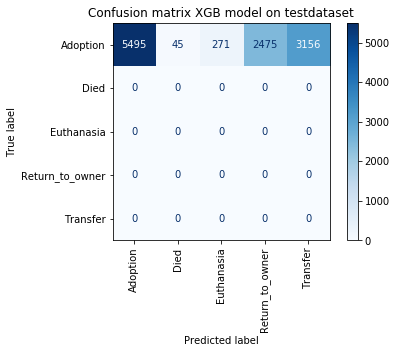

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['Adoption', 'Died', 'Euthanasia', 'Return_to_owner','Transfer']
title = "Confusion matrix XGB model on testdataset"
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 xticks_rotation = 'vertical',
                                 values_format = ".0f",
                                 normalize=None)
disp.ax_.set_title(title)
print(title)
plt.show()